In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [5]:
x, y = sklearn.datasets.make_moons(200, noise = 0.15)
x[:5], y[:5]

(array([[ 0.48126917,  0.85651174],
        [ 0.65750159,  0.59426168],
        [ 1.42341986, -0.80059994],
        [ 1.34839131, -0.49604909],
        [ 0.2184646 , -0.1770457 ]]), array([0, 0, 1, 1, 1]))

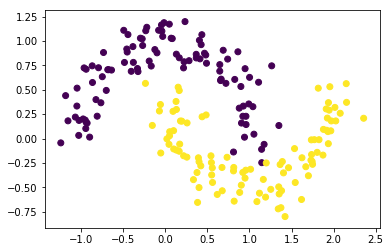

In [6]:
plt.scatter(x[:,0], x[:,1], c = y)

In [7]:
x.shape

(200, 2)

In [8]:
inputNeurons = 2 #because we have 2 features as we see above
outputNeurons = 2 #beacuse we are gonna use cross entropy loss (softmax inside)
samples = len(x)
learningRate = 0.001
lambdaReg = 0.01

In [9]:
modelDict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

NameError: name 'W1' is not defined

In [10]:
def retrieve(modelDict): 
    W1 = modelDict['W1']
    b1 = modelDict['b1']
    W2 = modelDict['W2']
    b2 = modelDict['b2']
    return W1, b1, W2, b2

In [11]:
def forward(x, modelDict):
    W1, b1, W2, b2 = retrieve(modelDict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1) #activation func
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exponentialScores = np.exp(a2)
    softmax = exponentialScores / np.sum(exponentialScores, dim = 1, keepdims = True)
    return softmax
    

In [13]:
def loss(softmax, y):
    W1, b1, W2, b2 = retrieve(modelDict)
    m = np.zeros(200)
    for i, correctIndex in enumerate(y):
        predicted = softmax[i][correctIndex]
        m[i] = predicted
    logProb = -np.log(predicted)
    softmaxLoss = np.sum(logProb)
    regLoss = lamdaReg / 2 * ((np.sum(np.square(W1)) + np.square(W2))) #L2 reg
    loss = softmaxLoss + regLoss
    return float(loss / len(y))

In [14]:
def predict(x, modelDict):
    W1, b1, W2, b2 = retrieve(modelDict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1) #activation func
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exponentialScores = np.exp(a2)
    softmax = exponentialScores / np.sum(exponentialScores, dim = 1, keepdims = True)
    return np.argmax(softmax, axis = 1) #axis = 1 refers to the columns, returning the max index not value